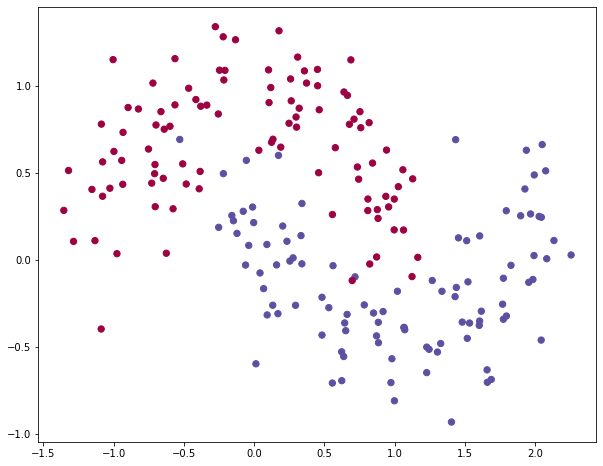

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

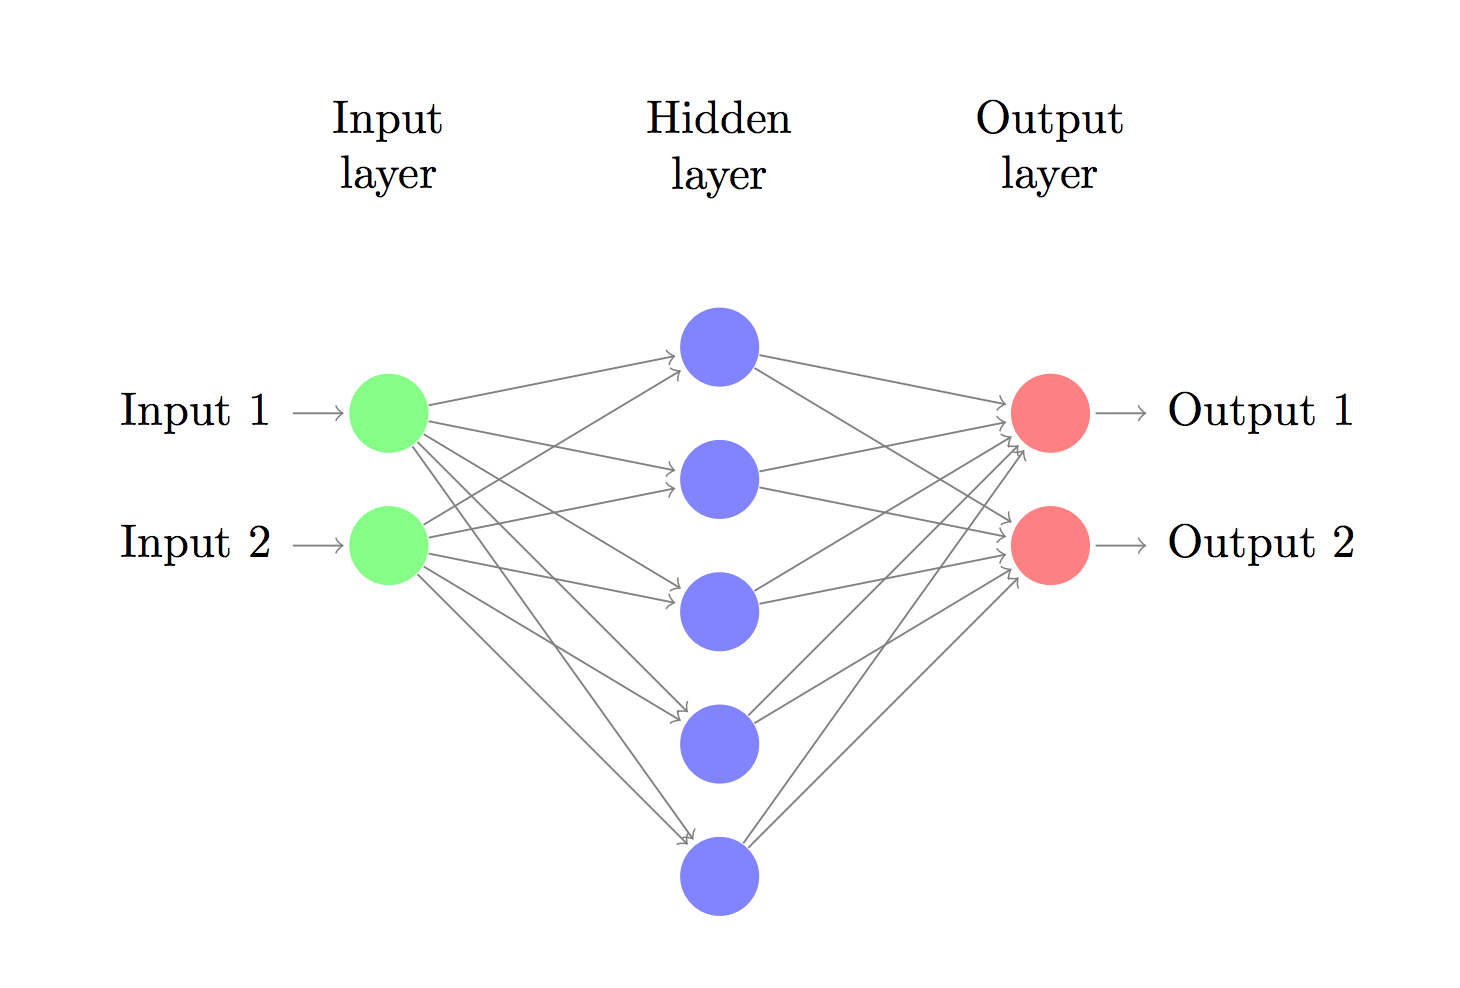


# 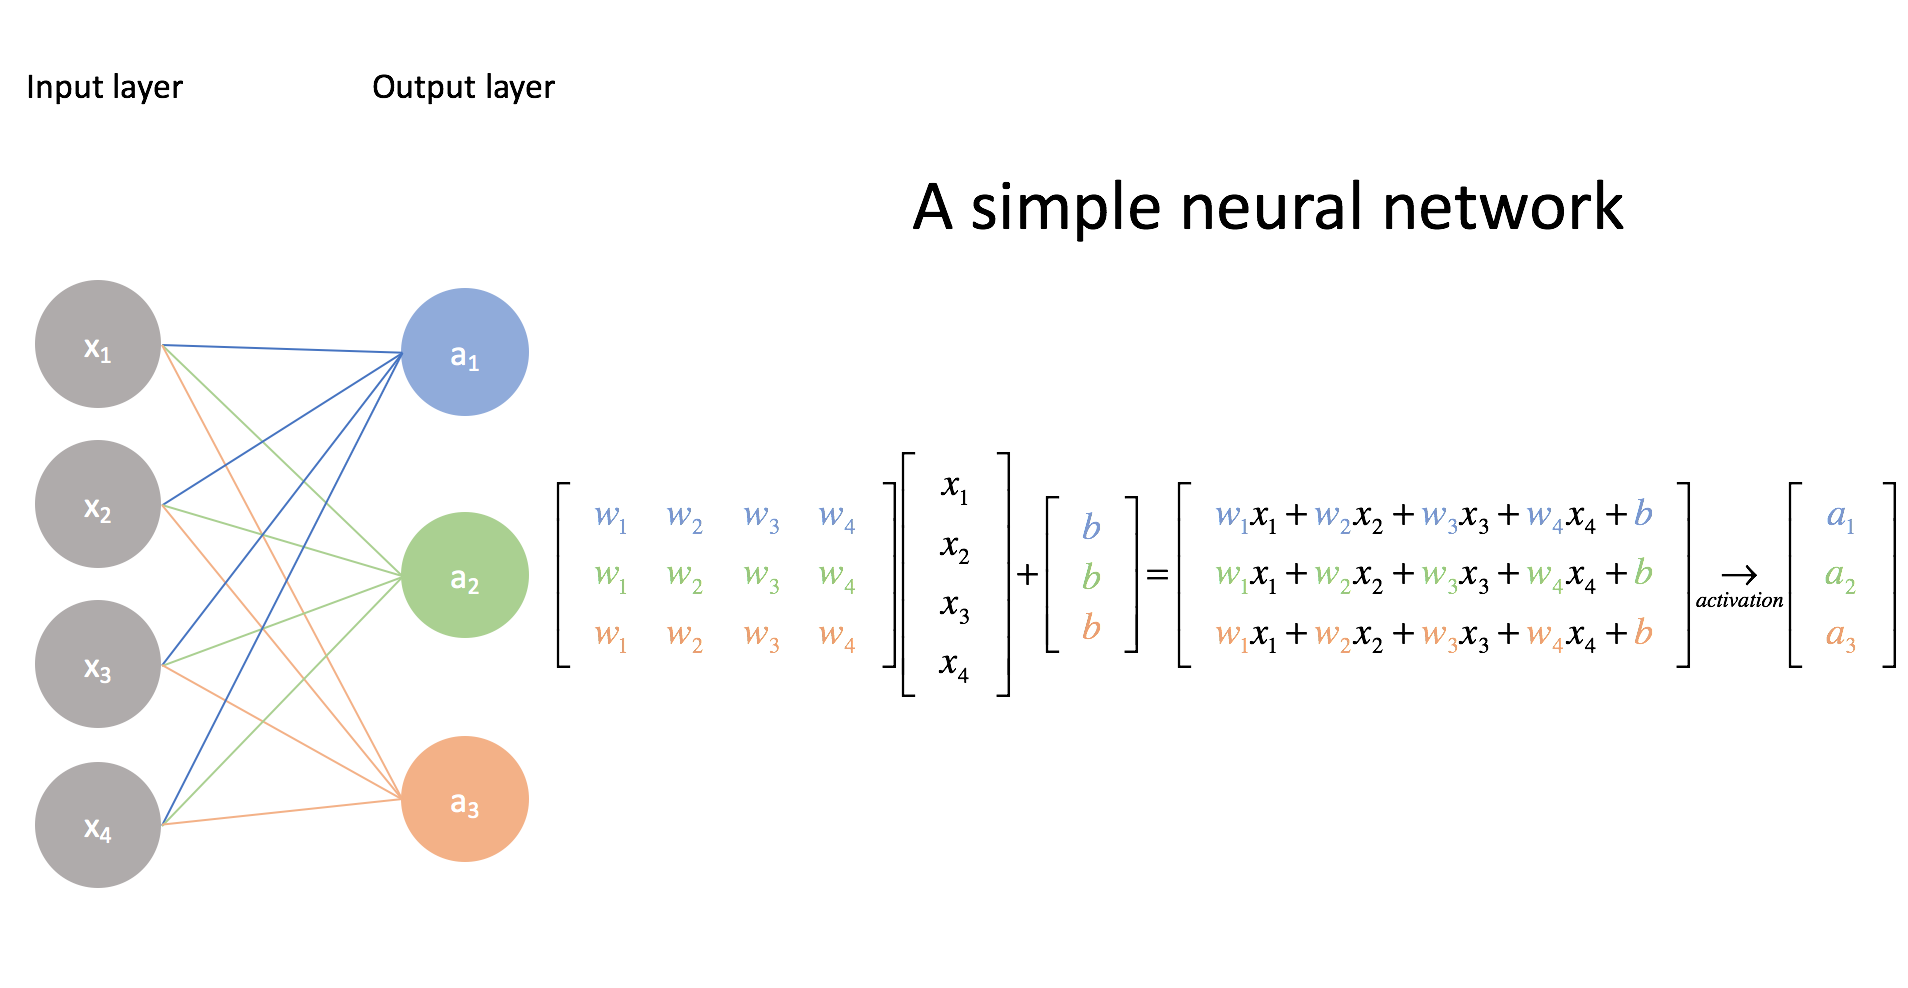

**Model**

In [142]:
num_examples = len(X)


def build_model(inp_dim, hidden_dim, output_dim):
  np.random.seed(0)

  w1 = np.random.randn(inp_dim, hidden_dim)
  b1 = np.zeros((1, hidden_dim))
  w2 = np.random.randn(hidden_dim, output_dim)
  b2 = np.zeros((1, output_dim))

  model = {'w1': w1,
           'b1': b1,
           'w2': w2,
           'b2': b2}

  return model


def predict(model, x):
  w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']

  # Forward propagation
  z1 = x.dot(w1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(w2) + b2
  exp_scores = np.exp(z2)

  # Divide by sum of values to get predict as a percentage
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

  return np.argmax(probs, axis=1)


**Cross Entropy Loss Function and Softmax**


In [143]:
def calculate_loss(model, x):
  W1, b1, W2, b2 = model['w1'], model['b1'], model['w2'], model['b2']

  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2

  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


  # Calculate the loss (cross entropy loss)
  correct_loss = -np.log(probs[range(num_examples), y])

  # Get average
  loss = np.sum(correct_loss)
  return 1./num_examples * loss


**Backpropagation**



In [144]:
def train(iterations, model):

  for i in range(iterations):

    W1, b1, W2, b2 = model['w1'], model['b1'], model['w2'], model['b2']

    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2

    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


    # Backpropagation
    # still dont understand derivation of delta3
    delta3 = probs
    delta3[range(num_examples), y] -= 1

    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)

    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))

    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)


    # Gradient descent parameter update
    model['w1'] += dW1 * -0.001
    model['b1'] += db1 * -0.001
    model['w2'] += dW2 * -0.001
    model['b2'] += db2 * -0.001

    if i % 1000 == 0:
      print(calculate_loss(model, X))
  
  return model

**Run**

In [145]:
# Param to be tweaked
nn_input_dims = 2
nn_hidden_dims = 50
nn_output_dims = 2

iterations = 40000

model = build_model(nn_input_dims, nn_hidden_dims, nn_output_dims)
model = train(iterations, model)


0.3398724486283797
0.07418291601400055
0.06173293552846287
0.055409093089246325
0.05133890413714662
0.0483529780668717
0.04598092526996981
0.04398957059536511
0.042249472177154496
0.04068607053475285
0.03925521755134979
0.03793014653709525
0.03669447188167317
0.035538087385377296
0.034454545361819015
0.03343935215249256
0.03248890226090702
0.03159986094433256
0.03076884961050054
0.029992325362052794
0.029266577412994585
0.0285877870230601
0.02795211457827667
0.027355789680590353
0.02679518955789221
0.02626689859149085
0.025767747294147793
0.025294832581927516
0.024845522893008818
0.024417452107411603
0.024008505859324056
0.023616803146269405
0.02324067540370999
0.02287864456855423
0.022529401148652678
0.02219178294865702
0.021864754858106128
0.021547389965112657
0.02123885220209126
0.020938380745881315


**Plot**

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

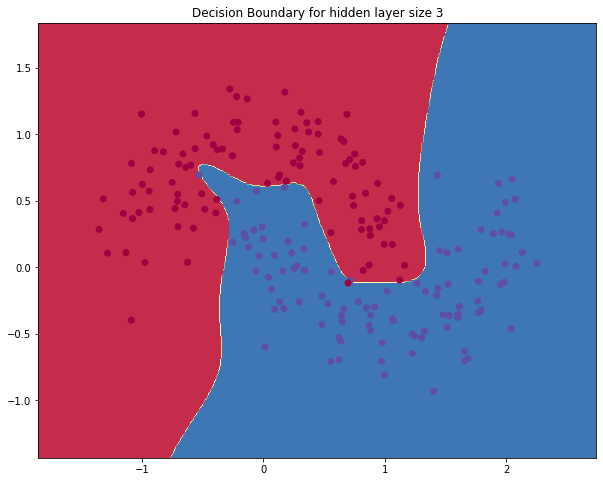

In [154]:
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [147]:
# import numpy as np

# W = np.random.randn(5, 4)
# X = np.random.randn(4, 1)
# D = W.dot(X)

# print(W.shape)
# print(X.shape)
# print(D.shape)

# dD = np.random.randn(*D.shape)
# dW = dD.dot(X.T)
# dX = W.T.dot(dD)
